프로젝트 도입

국내에서 가장 활성화된 복권 중 '로또 6/45' 가 있다. 게임의 규칙은 간단하다. 로또 를 구매하면 6개로 이루어진 번호를 받는다. 추첨시간이 되면, 주최측에서 6개의 번호 와 1개의 보너스 번호를 뽑고, 구매한 번호와 일치하는 갯수에 따라 상금이 나뉜다. 3개 이상 일치할 경우 '당첨' 이라고 한다.
이 때 구매방식에 '수동' 과 '자동' 이 있다. 수동은 직접 구매할 번호를 정할 수 있 고, 자동은 임의의 숫자를 부여받는 방식이다.
이러한 로또시스템을 통계에 근거하여, 예측 번호를 파는 사이트가 있다. 사이트에서 확인한 결과 가장 많이 나왔던 번호, 가장 적게 나왔던 번호 등이 나온다. 과연 그러 한 값으로 로또를 구매한다면 당첨확률이 높다고 말할 수 있을까?
'자동' 방식으로 로또를 구매하였을 때, 때로는 연속된 숫자를 부여받곤 한다. 그런 번호를 부여받았다면 당첨확률이 낮을 것이라는 직관이 든다. 그렇다면, 지금까지의 회차에서 연속된 번호를 포함하여 추첨된 경우가 실제로 작을까?
로또의 1등 당첨 금액이 과거와 비교하면 많이 증가하였다. 그러나 로또는 1게임 당 1000원으로 항상 동결이었다. 그럼에도 상금이 늘어난 것은 시간이 지나는 것과 관계 가 있을까? 최근 500회차의 경우를 통하여 관계성을 알아보자.

##기본 설정 (데이터  load , 라이브러리 import)

In [ ]:
#라이브러리 선언, 데이터 셋 가져오기 
from datascience import *
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math
import re
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(threshold=50)

lotto = Table.read_table('lotto_data.csv')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  


#가설 1
로또시스템을 통계에 근거하여, 예측 번호를 파는 사이트가 있다. 
사이트에서 확인한 결과 가장 많이 나왔던 번호, 가장 적게 나왔던 번호 등이 나온다. 과연 그러한 값으로 로또를 구매한다면 당첨확률이 높다고 말할 수 있을까?

In [2]:
#1000개의 데이터만 뽑아오고 , 상금과 회차를 정수형으로 교체하였음 
def convert(str_in_array):
  return int(str_in_array)

lotto = lotto.take(np.arange(1000))
for i in np.arange(1000):
    lotto.column(3)[i] = re.sub(r'[^0-9]', '', lotto.column(3)[i])
intprize = list(map(convert,lotto.column(3)))

lotto_num = lotto.drop(0,1,3)
lotto_num = lotto_num.with_columns("prize_num",lotto.column(0).astype(int),"prize",intprize)

##모집단 데이터 : lotto_num ===> lotto_num Table의 column 설명




|Column|Description|
---|---
|prize_num|회차번호|
|number|1등 당첨자 수|
|prize|1등 상금|
|각 숫자|해당 회차의 번호|
|bonus|보너스 번호|


In [3]:
#최종 data_set
lotto_num

number,1,2,3,4,5,6,Bonus,prize_num,prize
8,9,12,15,25,34,36,3,1010,3119380079
15,15,23,29,34,40,44,20,1009,1702462825
11,9,11,30,31,41,44,33,1008,2267377910
9,8,11,16,19,21,25,40,1007,2718786375
9,8,11,15,16,17,37,36,1006,2855602125
12,8,13,18,24,27,29,17,1005,2061199344
10,7,15,30,37,39,44,18,1004,2576251913
14,1,4,29,39,43,45,31,1003,1811116822
8,17,25,33,35,38,45,15,1002,3088449563
12,6,10,12,14,20,42,15,1001,2077279594


##전체 lotto 게임에서 3개 이상 맞추는 횟수를 반환하는 함수


In [4]:
def count_win(data_set , model):
  """
  input 
  data_set : 전체 lotto 게임의 정보를 담고 있는 테이블
  model : 게임에 사용할 번호

  output
  전체 회차에서 3개 이상 맞춘 횟수
  """
  count = 0
  check = make_array()
  data_set = data_set.drop(0,8,9)
  for i in np.arange(1000):
    for j in np.arange(7):
      for k in np.arange(6):
        if( data_set.row(i)[j] == model[k]):
          count = count + 1
    check = np.append(check , count)
    count = 0
  return np.count_nonzero(check > 2)

##변수들의 정의 및 설명

|var|Description|
---|---
|model_lack|전체 게임에서 최빈값|
|model_lot|전체 게임에서 최다값|
|count_model_lack|해당 모델로 측정한 3개 이상 맞춘 횟수|
|count_model_lot|해당 모델로 측정한 3개 이상 맞춘 횟수|
|count_model_sample|임의로 생성한 번호로 전체 게임에서 3개 이상 맞춘 횟수를 담은 배열|


In [5]:
#가장 적게 나왔었던 번호들로 구성된 배열 model_lack 생성
model_lack = make_array()
index = [ "1" , "2" ,"3" ,"4" ,"5" , "6" ]
for i in np.arange(6):
  model_lack = np.append(model_lack , lotto_num.group(index[i]).sort("count").column(0)[0])
model_lack

array([25., 37., 40.,  5.,  9., 19.])

In [6]:
#가장 많이 나왔었던 번호들로 구성된 배열 model_lot 생성
model_lot = make_array()
index = [ "1" , "2" ,"3" ,"4" ,"5" , "6" ]
for i in np.arange(6):
  model_lot = np.append(model_lot , lotto_num.group(index[i]).sort("count",descending = True).column(0)[0])
model_lot

array([ 1., 10., 20., 31., 34., 45.])

In [7]:
#model_lack이 전체회차 게임을 하였다면 3개 이상 맞추었을 횟수 = 25회
count_model_lack = count_win(lotto_num , model_lack)
count_model_lack

25

In [8]:
#model_lot이 전체회차 게임을 하였다면 3개 이상 맞추었을 횟수 = 38회
count_model_lot = count_win(lotto_num , model_lot)
count_model_lot

38

##시뮬레이션 하여 임의로 생성된 번호의 3개 이상 맞았을 횟수 조사
 - make_sample = 1부터 45까지의 번호 중 임의로 6개를 중복없이 추출해주는 함수

In [9]:
def make_sample():
  """
  중복 허용 x
  1부터 45까지의 숫자 중 랜덤 
  6개의 배열을 반환
  """
  sample = make_array()
  model_sample = np.arange(1.,46.)
  np.random.shuffle(model_sample)
  for i in np.arange(6):
    sample = np.append(sample ,model_sample[i])
  return sample

In [10]:
#임의의 숫자 배열 1세트 만들고 게임에서 3회 이상 맞춘 횟수를 구하기를 500번 시행
count_model_sample = make_array()
for i in np.arange(500):
  sample = make_sample()
  temp = count_win( lotto_num , sample) 
  count_model_sample = np.append(count_model_sample, temp)
count_model_sample

array([46., 26., 49., ..., 43., 38., 37.])

##결과 - 측정값들을 토대로 그래프 생성

Text(0, 0.5, 'count win ')

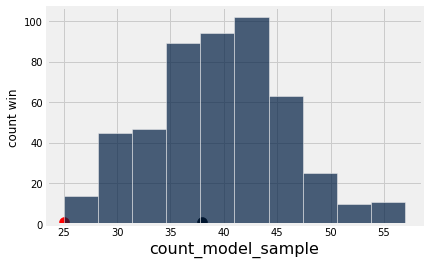

In [11]:
#왼쪽 아래 점 : model_lack / 오른쪽 아래 점 : model_lot
Table().with_column("count_model_sample",count_model_sample).hist(density = None , bins=10)
plots.scatter(count_model_lack, 1, color='red', s=100); 
plots.scatter(count_model_lot, 1, color='black', s=100); 
plt.ylabel("count win ")

In [12]:
#임의로 아무 번호를 뽑았을 때, 99퍼센트 확률로 최빈값보다 당첨 확률이 크고
#56퍼센트의 확률로 최다값보다 당첨확률이 크다.
#따라서 번호를 추정하는 일은 그다지 의미가 없다. 
p_val_lack = np.count_nonzero(count_model_sample > count_model_lack) / 500
p_val_lot = np.count_nonzero(count_model_sample > count_model_lot) / 500
{p_val_lack , p_val_lot}

{0.558, 0.996}

##가설 1의 결론
- 최다 등장 번호 배열로 하는 것이, 최소 등장 번호보다 당첨확률이 높다
- 그러나, 최다 등장번호 배열이 임의로 생성한 번호보다 첨확률이 높다고 말할 수 없다
- 즉, 번호를 제공하는 업체를 사용하는 것은 의미없는 행동이다. 

#가설 2
 - '자동' 방식으로 로또를 구매하였을 때, 때로는 연속된 숫자를 부여받곤 한다. 그런 번호를 부여받았다면 당첨확률이 낮을 것이라는 직관이 든다. 그렇다면, 지금까지의 회차에서 연속된 번호를 포함하여 추첨된 경우가 실제로 작을까?


In [13]:
lotto_seq = Table.read_table('https://raw.githubusercontent.com/linjuGitHub/datascience/main/Lottery.csv').drop(0,1,2,3).take(np.arange(1000))

In [14]:
#가설 2에서 사용할 data_set
lotto_seq

1,2,3,4,5,6,Bonus
9,12,15,25,34,36,3
15,23,29,34,40,44,20
9,11,30,31,41,44,33
8,11,16,19,21,25,40
8,11,15,16,17,37,36
8,13,18,24,27,29,17
7,15,30,37,39,44,18
1,4,29,39,43,45,31
17,25,33,35,38,45,15
6,10,12,14,20,42,15


##변수들의 정의 및 설명

|var|Description|
---|---
|observed|1000회차에서 연속된 숫자가 있었던 회차의 수|
|count_sample_seq|임의의 1000개 회차 생성시 연속된 숫자가 있었던 수를 500회 반복하여 담은 배열| 

##함수 정의
- 테이블을 입력받으면 전체 회차에서 연속된 숫자가 얼마나 있었는지 세는 함수
- 배열을 입력받으면, 그 배열에 연속된 숫자가 얼마나 있었는지 세는 함수

In [15]:
def seq(table):
  """
  table: 테이블
  각 행에 연속된 숫자가 얼마나 있는지 세어보는  함수

  output
  (1,2)처럼 연속된 두 개의 숫자로 이루어진 쌍의 개수

  """
  hap = make_array()
  for i in np.arange(table.num_rows):
    count=0
    A = np.asarray(list(table.row(i)))
    for j in np.arange(1,45):
      if np.count_nonzero(A==j)+np.count_nonzero(A==j+1)==2:
        count+=1
    hap = np.append(hap, count)
  return hap

In [16]:
def seq_arr(array):
  """
  array: 배열
  랜덤 배열에 연속된 숫자가 얼마나 있는지 세어보는 함수

  output
  (1,2)처럼 연속된 두 개의 숫자로 이루어진 쌍의 개수
  
  """
  count=0
  for i in np.arange(1,45):
    if np.count_nonzero(array==i)+np.count_nonzero(array==i+1)==2:
      count+=1
  return count

##결과 - 통계값과 샘플링한 값 추출

In [17]:
# 1000회의 회차에서 연속된 배열이 나온 횟수 = 643 
# 즉, 1000회에서 연속된 숫자가 등장했던 배열이 오히려 더 많았다.
count_seq = seq(lotto_seq)
observed = np.count_nonzero(count_seq>0)
observed 

643

In [18]:
#랜덤게임 500회 생성 후 연속된 숫자 쌍 갯수를 저장하기 
count_sample_seq = make_array()
for j in np.arange(500):
  jung = make_array()
  temp = np.arange(1,46)
  for i in np.arange(1000):
    input = np.random.shuffle(temp)
    jung = np.append(jung, seq_arr(temp[:7]))
  count_sample_seq = np.append(count_sample_seq, np.count_nonzero(jung))

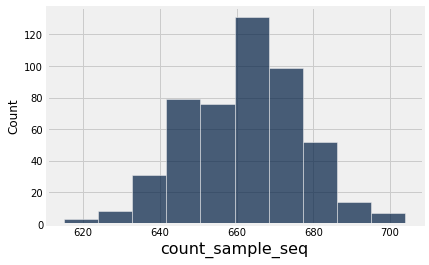

In [19]:
Table().with_column(
    'count_sample_seq', count_sample_seq
).hist(density = False)

In [20]:
#평균값이 1000회 중 661.596 회 이므로, 대략 66.2% 확률로 연속된 숫자가 게임에 포함된다. 
np.mean(count_sample_seq)

662.048

##가설2의 결론
연속된 숫자가 포함된 회차가 1000 회차 중에서 643회이므로, 절반 이상이 연속된 숫자를 포함하고 있다. 또한 임의의 번호 배열 1000개의 생성에서도 연속된 숫자를 66.2% 확률로 추출한다. 
 - 따라서 연속된 번호 배열이 당첨확률이 낮을 것이라는 건 잘못된 직관이다. 

#가설3
 - 로또의 1등 당첨 금액이 과거와 비교하면 많이 증가하였다. 그러나 로또는 1게임 당 1000원으로 항상 동결이었다. 그럼에도 상금이 늘어난 것은 시간이 지나는 것과 관계가 있을까?

##기본설정 (연산하기 좋은 형태 변환)

In [21]:
lotto = Table.read_table('https://raw.githubusercontent.com/linjuGitHub/datascience/main/Lottery.csv').take(np.arange(500))


In [22]:
def convert(str_in_array):
  return int(str_in_array.rstrip(",원"))
#2011년부터의 데이터만 가져오고, 상금과 회차를 정수형으로 교체하였음 

for i in np.arange(500):
  lotto.column(3)[i] = re.sub(r'[^0-9]', '', lotto.column(3)[i])
intprize = list(map(convert,lotto.column(3)))

lotto.drop(0,3)
lotto_num = lotto.with_columns("prize_num",lotto.column(0).astype(int),"prize",intprize)

In [23]:
#1등 당첨금액의 총합을 table에 추가
data = make_array()
for i in np.arange(500):
  data=np.append(data , lotto_num.row(i)[3] * lotto_num.row(i)[2] / 100000000)
lotto_num = lotto_num.with_column("sum_prize",data)  #단위 : 억

##모집단 데이터 data set (sum_prize 추가 : 1등 당첨금액의 합)

In [24]:
lotto_num

prize_num,date,number,prize,1,2,3,4,5,6,Bonus,sum_prize
1010,2022.04.09,8,3119380079,9,12,15,25,34,36,3,249.55
1009,2022.04.02,15,1702462825,15,23,29,34,40,44,20,255.369
1008,2022.03.26,11,2267377910,9,11,30,31,41,44,33,249.412
1007,2022.03.19,9,2718786375,8,11,16,19,21,25,40,244.691
1006,2022.03.12,9,2855602125,8,11,15,16,17,37,36,257.004
1005,2022.03.05,12,2061199344,8,13,18,24,27,29,17,247.344
1004,2022.02.26,10,2576251913,7,15,30,37,39,44,18,257.625
1003,2022.02.19,14,1811116822,1,4,29,39,43,45,31,253.556
1002,2022.02.12,8,3088449563,17,25,33,35,38,45,15,247.076
1001,2022.02.05,12,2077279594,6,10,12,14,20,42,15,249.274


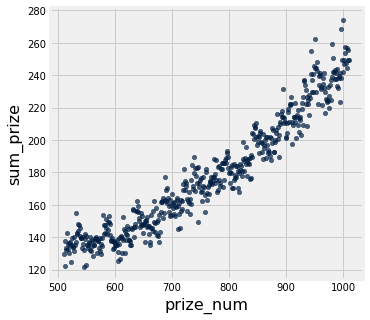

In [25]:
#회차와 총 상금액이 비례관계에 있는 것을 관찰 -> 상관관계를 가질 것인가?
lotto_num.scatter("prize_num","sum_prize")

##함수 생성
 - 상관계수 r을 구하는 함수
 - 기울기 slope를 구하는 함수
 - 정규화를 해주는 함수

In [26]:
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

##결과 - 정규화 후 상관계수 도출 및 확인, 기울기 값으로 증가량 추정 

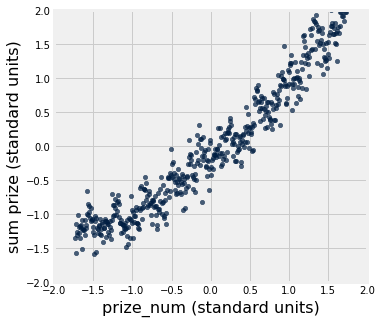

In [27]:
#정규화하여 나타낸 회차와 당첨금
#상관관계를 보기 위하여 정규화 진행
Table().with_columns(
    'prize_num (standard units)',  standard_units(lotto_num.column('prize_num')), 
    'sum prize (standard units)', standard_units(lotto_num.column('sum_prize'))
).scatter(0, 1)
plots.xlim(-2, 2)
plots.ylim(-2, 2);

In [28]:
#상관계수 r을 구한다. 0.957 이므로 높은 양의 상관관계를 가진다고 할 수 있다.
r = correlation(lotto_num,'prize_num','sum_prize')
r

0.9572229320387255

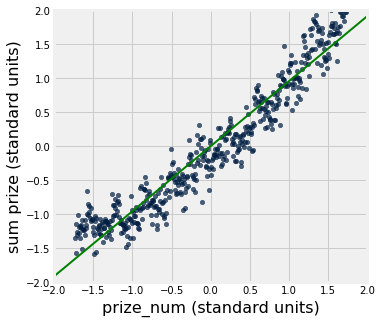

In [29]:
#상관계수로 부터 나온 기울기로 직선 그리기.
#상관계수에 근거하여 직선을 그림
#분포의 중앙을 지나는 직선인 것을 확인
Table().with_columns(
    'prize_num (standard units)',  standard_units(lotto_num.column('prize_num')), 
    'sum prize (standard units)', standard_units(lotto_num.column('sum_prize'))
).scatter(0, 1)
plots.xlim(-2, 2)
plots.ylim(-2, 2);
plots.plot([-2,2],[-2*r,2*r], color='g', lw=2)

In [30]:
#기울기 값을 통해 매 회차마다 증가하는 1등의 총 상금액을 구하자,
#회차마다 0.237억씩 증가한다. 
prize_slope = slope(lotto_num, 'prize_num', 'sum_prize')
prize_slope

0.23757744746875026

##가설3 결론
 - 회차와 당첨금액의 총량은 높은 상관관계를 지닌다 (r = 0.957)
 - 따라서 회차가 지난다면 당첨금액도 증가할 것 이다.
 - 증가량은 대략 1회차 당 0.237억 일 것이다. 

최종 결론


실제로 확인한 결과 가장 많이 나왔던 번호와 가장 적게 나왔던 번호의 배열은 당첨 확률에 큰 도움이 되지 않았다.
그리고 연속된 숫자로 이루어진 번호의 경우도 마찬가지로 당첨확률이 낮아지는 결 과를 초래하지 않는다.
회차와 1등 총 상금액은 양의 상관관계를 지니고, 회차 당 0.237억 가량 증가한다.
실생활에서 로또를 마주할 때면, 문득 '가장 많이 나온 값으로 구매를 한다면, 본전 은 따지 않을까?' 혹은 자동으로 구매했을 때, '연속된 숫자가 있으니 당첨될 확률이 낮겠구나.' 하는 직관적인 생각이 든다. 데이터 사이언스 과목을 수강하며 배운 내용 들을 통해, 직접 그런 특정값을 추출할 수도 있고, 지금까지의 회차에 적용할 수 있다 는 점이 긍정적이었다.
텀프로젝트를 진행하며, 생긴 문제점은 가설 1번에서 sampling 하는 것이 너무 오 랜 시간이 필요하다는 점이다. 샘플의 갯수는 500개, 비교할 회차는 1000개이며, 각 회차 당 42번의 비교를 거친다. 따라서 연산의 횟수가 (2100만회 + a) 이기 때문에 실행결과를 얻기위해 많은 시간이 필요하다. 그러므로, 향후계획으로 연산 횟수를 줄 이는 알고리즘을 생각해보는 것이 좋을 듯 하다.